# Testing the orientation distribution of GRBs

Let us assume that the jet opening angle, $\theta_j$, of short GRBs is that given by Figure 3 of [Fong _et al_ (2014)](http://arxiv.org/abs/1309.7479). We can model this as a [Rayleigh distribution](https://en.wikipedia.org/wiki/Rayleigh_distribution) with a median of 10 degrees, or mode of 5 degrees, and a probability distribution of
$$
p(\theta_j|\sigma) = \frac{x}{\sigma^2}e^{-\theta_j^2/(2\sigma^2)},
$$
where $\sigma = \frac{m_1}{\sqrt{2\ln{2}}}$ for a median value $m_1$ or $\sigma = m_2$ for a mode value of $m_2$.

What we actually want is the distribution of orientations, $\iota$, of the GRBs $p(\iota|\sigma=5)$. This will be given by
$$
p(\iota|\sigma=5) = \int_{\theta_j} p(\iota|\theta_j)p(\theta_j|\sigma=5) \mathrm{d}\theta_j.
$$
If we can assume that the distribution $p(\iota|\theta_j)$ is a [Heaviside step function](https://en.wikipedia.org/wiki/Heaviside_step_function), i.e. the beam has a sharp detectable boundary, then
$$
p(\iota|\theta_j) = H[\theta_j |\iota)|] = \begin{array}{cc} 0 & \textrm{when } \theta_j - |\iota| < 0 \\
1 & \textrm{when } \theta_j - |\iota| \ge 0.
\end{array}
$$
If we're just interesting in the positive $\iota$ values then we can perform this integral over a range of values from 0 to 90 degrees.

In [21]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as pl

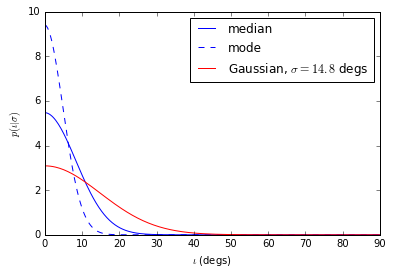

In [40]:
iotas = np.linspace(0., np.pi/2., 250)

def heaviside(vals, pos):
    # Heaviside step function
    f = np.zeros(len(vals))
    f[vals > pos] = 1.
    return f

def rayleigh(vals, sigma):
    # Rayleigh distribution
    f = (vals/sigma**2)*np.exp(-vals**2/(2*sigma**2))
    return f

piota = np.zeros(len(iotas))
thetas = np.linspace(0, np.pi/2, 250)

median = 10.*np.pi/180. # median of 10 degrees
mode = 5.*np.pi/180.    # mode of 5 degrees

sigmas = [median/np.sqrt(2.*np.log(2.)), mode]
colors = ['b', 'b--']
labels = ['median', 'mode']

for j, sigma in enumerate(sigmas):
    rthetas = rayleigh(thetas, sigma)
    for i, iota in enumerate(iotas):
        piota[i] = np.trapz(rthetas*heaviside(thetas, iota))

    piota = piota/np.trapz(piota, iotas)
    pl.plot(iotas*180./np.pi, piota, colors[j], label=labels[j])

pl.xlim((0, 90.))

# plot a Gaussian of standard deviation 14.8 degrees
sg = 14.8*np.pi/180.
g = (2./(np.sqrt(2.*np.pi)*sg))*np.exp(-(iotas**2)/(2.*sg**2)) # multiplicative factor of 2 for normalisation of half width Gaussian
pl.plot(iotas*180./np.pi, g, 'r', label='Gaussian, $\sigma=14.8$ degs')

pl.xlabel('$\iota$ (degs)')
pl.ylabel('$p(\iota|\sigma)$')
pl.legend()

The above plot shows that using a Rayleigh distribution with the median of mode of the jet opening angles given by [Fong _et al_ (2014)](http://arxiv.org/abs/1309.7479) actually leads to narrower distributions of the source orientation angle than we have used. 